<center>

*******************************************************************************************
<font size="4">
Pre-processing of AlphaPose Output &nbsp; &nbsp; <br>
</font>

##### 4 August 2025

##### Juan Ignacio Mendoza Garay

*******************************************************************************************

</center>

##### INFORMATION:

* This program extracts one point of the human body (in this demonstration the nose), for every tracked person. The output JSON file from AlphaPose is loaded. Then, extraneous data is removed, missing data is interpolated, and tabular data is arranged. The resulting table has columns {p1_x,p1_y,p2_x,p2_y,...} where p is a tracked person from left to right, and {x,y} are horizontal and vertical coordinates of the point.

* Tested using:
    * Python 3.11
    * Windows 11
    * Intel 64-bit CPU
>
* Instructions:

    Edit the values indicated with an arrow like this: <---

*******************************************************************************************

In [1]:
import sys

sc_path = 'C:/Users/me/SynCoord/src' # <--- SynCoord's source folder
sys.path.append(sc_path)
import syncoord as sc

***
### Set paths
These folders should exist before running the program. They will not be created automatically.

In [62]:
main_path = 'C:/Users/me'                              # <---
project_folder = main_path + '/Borodin_Quartet'        # <--- project folder

pose_tracking_path = project_folder + '/pose_tracking' # <---

json_path = pose_tracking_path + '/tracking'           # <--- tracking (json format)

json_path = json_path + '/AlphaPose_Borodin_Quartet_4_7_[608,0.8,0.1].json'

prep_path = pose_tracking_path + '/preprocessed'       # <--- pre-processed data (parquet format)
figs_path = pose_tracking_path + '/figures'            # <--- raw and pre-processed data


***
### Pre-processing

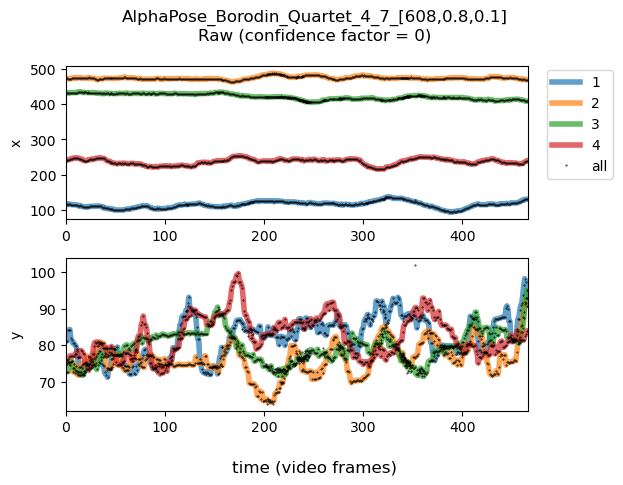

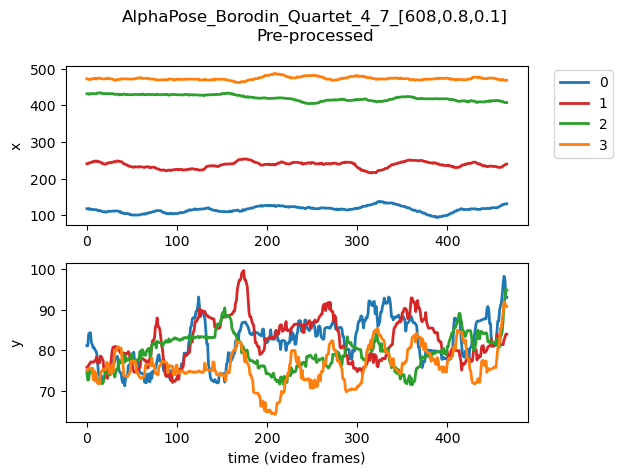

[]


In [65]:
# Paths to save pre-processing results:
savepaths = {'parquet': prep_path,      # <--- preprocessed data files (parquet format)
             'rawfig': figs_path,       # <--- raw data visualisations
             'prepfig': figs_path,      # <--- preprocessed data visualisatons
             'log': pose_tracking_path} # <--- log text file

# General processing parameters:
vis = {'show': 'ind'}
prepargs = {'skip_done': False,         # <--- skip if resulting parquet file exists
            'n_indiv': 4,               # <--- number of expected individuals
            'fillgaps': True,           # <--- fill missing data
            'verbose': False}           # <--- print additional information

# # If AlphaPose's automatic tracking is not correct, try these (comment/uncomment):
vis = {'show': 'dim'}                   # <--- plot per dimension ('dim') or individual ('ind')
prepargs['confac'] = 0                # <--- confidence factor for selectivity [0..1]
# prepargs['drdim'] = 0                   # <--- dimension to apply limits for individuals
# prepargs['drlim_set'] = [0,165,350,450,484] # <--- set limits manually (list)

drlims = sc.video.poseprep(json_path, savepaths, vis, **prepargs)
print(drlims )